In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [290]:
data=pd.read_csv('index_price_data.csv')
df=data
df.head()

,Unnamed: 0,Year,Month,Interest_rate,Unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [291]:
df.isnull().sum()


Unnamed: 0           0
Year                 0
Month                0
Interest_rate        0
Unemployment_rate    0
index_price          0
dtype: int64

In [292]:
df.describe()

,Unnamed: 0,Year,Month,Interest_rate,Unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,11.500000,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,7.071068,0.510754,3.526299,0.349527,0.33002,210.735341
min,0.000000,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,5.750000,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,11.500000,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,17.250000,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,23.000000,2017.000000,12.000000,2.750000,6.20000,1464.000000


In [293]:
df=df.drop(columns=['Unnamed: 0','Year','Month'])
df.head()

,Interest_rate,Unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [294]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


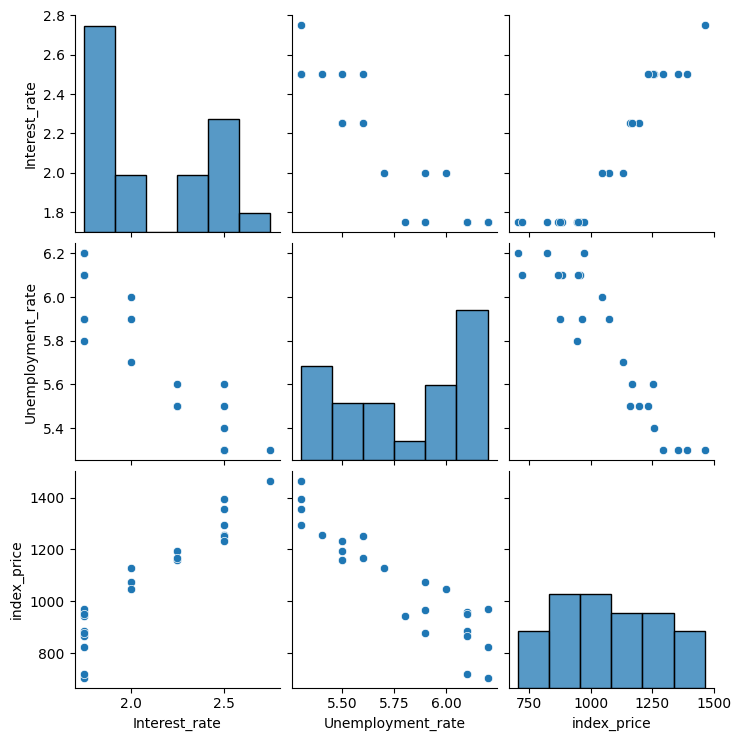

In [295]:
import seaborn as sns
sns.pairplot(df)

In [296]:
df.corr()

,Interest_rate,Unemployment_rate,index_price
Interest_rate,1.000000,-0.925814,0.935793
Unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


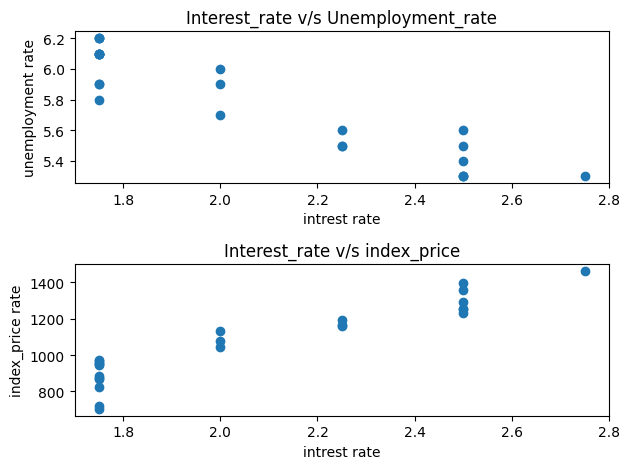

In [297]:
plt.subplot(2,1,1)
plt.xlabel('intrest rate')
plt.ylabel('unemployment rate')
plt.title('Interest_rate v/s Unemployment_rate')
plt.scatter(df['Interest_rate'],df['Unemployment_rate'])

plt.subplot(2,1,2)
plt.xlabel('intrest rate')
plt.ylabel('index_price rate')
plt.title('Interest_rate v/s index_price')
plt.scatter(df['Interest_rate'],df['index_price'])


plt.tight_layout() 

In [298]:
X=df[['Interest_rate','Unemployment_rate']]
y=df['index_price']

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [300]:
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
X_train=scal.fit_transform(X_train)
X_test=scal.transform(X_test)


In [301]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [302]:
y_pred=regression.predict(X_test)
y_pred 

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [303]:
regression.predict(scal.transform([[2.50,5.3]]))

d:\ML code\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1341.42873089])

In [304]:
from sklearn.metrics import r2_score

y_pred = regression.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8278978091457145


In [305]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(mae)
print(mae)
print(rmse)

59.935781523235484
59.935781523235484
76.11677139574805


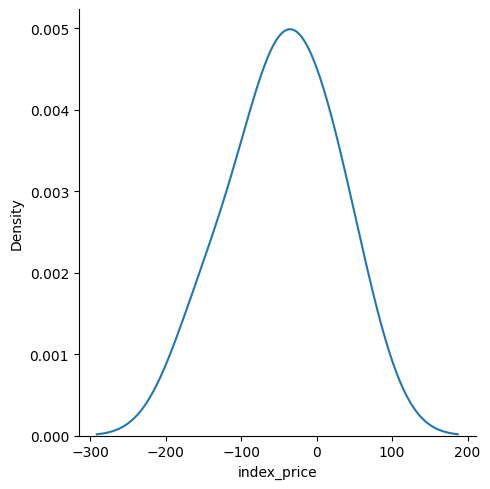

In [306]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')

In [1]:
print("The code is complete.")

The code is complete.
